In [116]:
import numpy as np
import pandas as pd

In [117]:
#Visualisation Library
import seaborn as sns
import matplotlib.pyplot as plt

#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

#Classification model 
from sklearn.linear_model import LogisticRegression

#Classification model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#To split the model into training and testing data
from sklearn.model_selection import train_test_split

#Different model improvement packages
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Evaluation metrics
from sklearn import metrics

# Load Data

In [118]:
data = pd.read_csv('housing.csv', sep='\s+')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


CRIM：每个城镇的人均犯罪率  
ZN：超过25,000平方英尺的住宅用地比例  
INDUS：每个城镇的非零售业务面积比例   
CHAS：查尔斯河虚拟变量（如果地块与河流接壤，则为1；否则为0） 
NOX：一氧化氮浓度（每千万份）  
RM：每个住宅的平均房间数  
AGE：建于1940年之前的自住单位比例  
DIS：到波士顿五个就业中心的加权距离  
RAD：到径向高速公路的可达性指数  
TAX：每10,000美元的全额财产税率  
PTRATIO：城镇的学生与教师比例  
B：1000（Bk - 0.63）^ 2，其中Bk是城镇黑人比例  
LSTAT：人口的低社会地位百分比  

In [119]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [120]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [121]:
data.shape

(506, 14)

In [122]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [123]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


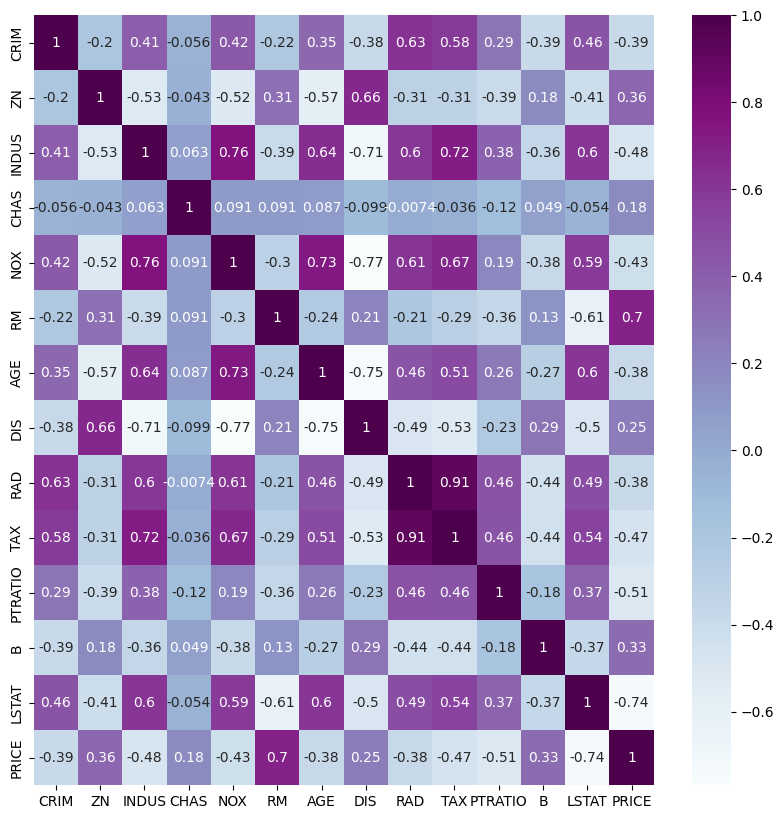

In [124]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='BuPu',annot=True)
plt.show()

# 线性回归

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
X=data.drop('PRICE',axis=1)
y=data['PRICE']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [128]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [129]:
y_pred = lr.predict(X_train)
y_pred

array([24.52247959, 15.19750953, 25.5772058 , 13.93939959, 39.46651291,
       17.45959949, 39.71029914, 16.51748069, 20.19733317, 40.7977555 ,
       33.57245034, 14.50420619, 11.44514488, 23.06563951, 24.39734404,
       25.01096096, 14.36116466, 28.28341539, 25.04931481, 22.42825155,
       21.81588517, 18.85208726, 13.3562124 , 13.65792701, 23.64766018,
       18.06876331, 16.12957228, 41.12414874, 19.43391814, 13.17980896,
       12.88401778, 24.48360463, 24.47855835, 22.1443201 , 23.67882714,
       16.25760322, 18.73996794,  6.65661308, 13.32321855, 15.97333187,
       18.13637439, 20.60454402, 30.72884443,  7.75848746, 13.9207036 ,
       -3.80684116, 30.22337446,  9.24045737, 11.75825936, 25.0286616 ,
       18.84078418, 11.88476435, 28.69569373, 23.23374551, 28.59506092,
       20.30414612, 20.27099511, 25.21759304, 29.00813278, 17.29931495,
       10.61483731, 28.61476335, 28.34559327, 30.02547802, 17.11529423,
       20.57024793, 18.28474144, 13.03972891, 23.08527124, 22.90

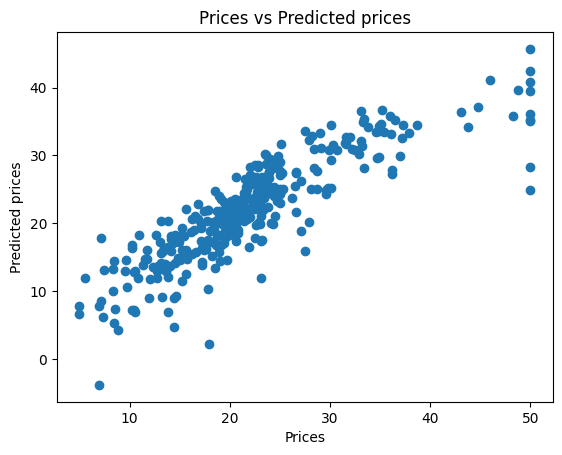

In [130]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [131]:
y_test_pred = lr.predict(X_test)

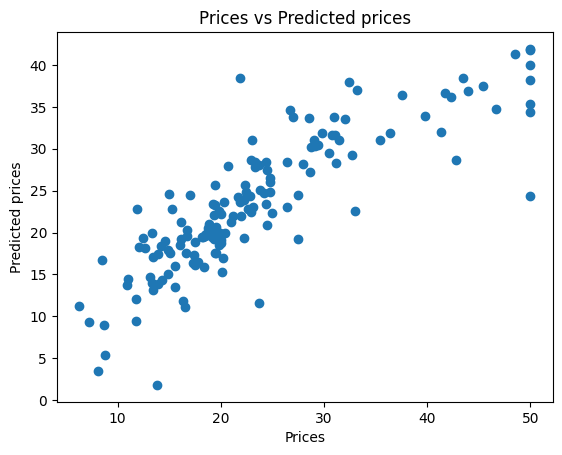

In [132]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# 随机森林

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [135]:
y_pred = reg.predict(X_train)

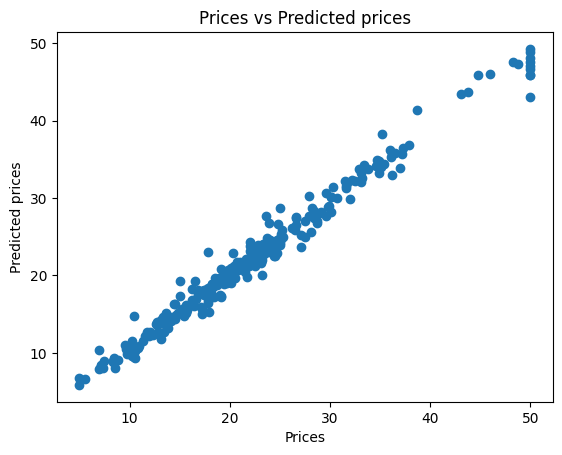

In [136]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [137]:
y_test_pred = reg.predict(X_test)

In [138]:
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8227420228218912
Adjusted R^2: 0.8060438075804752
MAE: 2.5565657894736837
MSE: 18.509290789473688
RMSE: 4.302242530294368


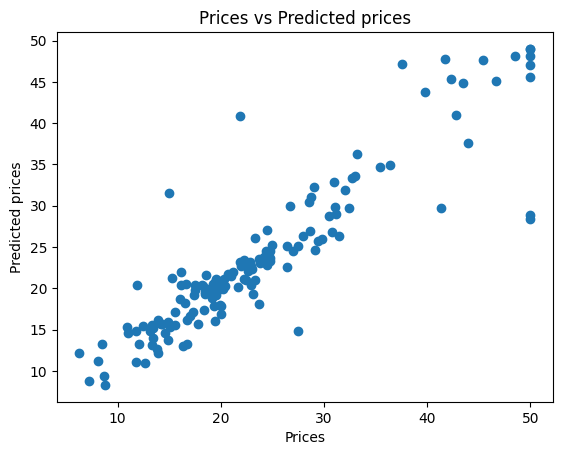

In [139]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# XGBoost Regressor

In [140]:
from xgboost import XGBRegressor

In [141]:
XGBreg = XGBRegressor()
XGBreg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [142]:
y_pred = XGBreg.predict(X_train)

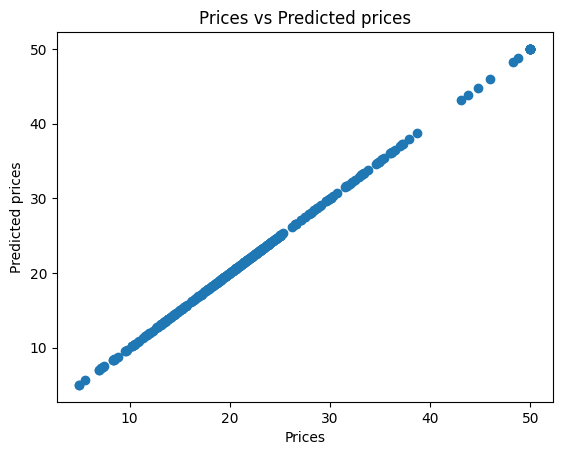

In [143]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [144]:
y_test_pred = XGBreg.predict(X_test)

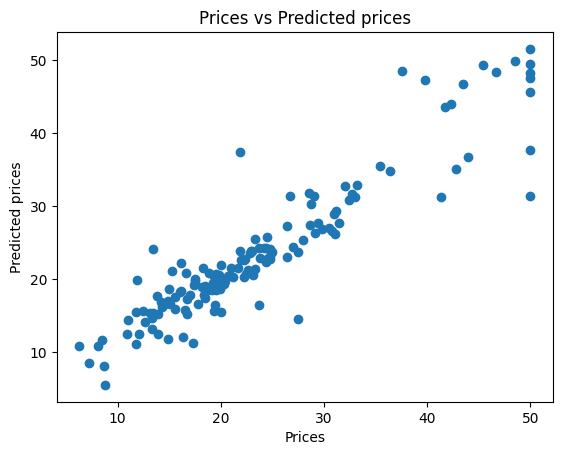

In [145]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()